<a href="https://colab.research.google.com/github/jordantcarlisle/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales = []

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [29]:
# mean
total = sum(sales)
mean_sales = total/len(sales)
print('Average sales from last week:', mean_sales)

Average sales from last week: 3052.714285714286


In [43]:
# mean function
def mean(data):
  return sum(data) / len(data)
print('mean', mean(sales))

# variance
def variance(data):
    mu = mean(data)
    return mean([(x - mu) ** 2 for x in data])
print('variance', variance(sales))

# standard deviation
def stddev(data):
  return variance(data) ** (1/2)
print('standard deviation', stddev(sales))

mean 3052.714285714286
variance 183761.06122448976
standard deviation 428.67360686714756


In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
np.mean(sales)

3052.714285714286

In [38]:
# I've run this and re-written this several times and it just doesn't seem right
np.var(sales)

183761.06122448976

In [45]:
np.std(sales)

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [41]:
np.cov(sales, customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [49]:
 df = pd.DataFrame({'sales': sales, 'customers': customers})
 df

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [101]:
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


In [102]:
df.cov().values[0][1]

7604.357142857142

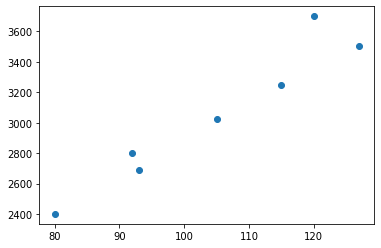

In [56]:
plt.scatter(df['customers'], df['sales'],);

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [61]:
# standard deviation of customers
std_sales = df['sales'].std(ddof = 1)
std_customers = df['customers'].std(ddof = 1)
print('standard deviation of sales', std_sales,'\n','standard deviation of customers', std_customers)

standard deviation of sales 463.0204150595357 
 standard deviation of customers 17.057326313123664


In [63]:
cov_sc = df['sales'].cov(df['customers'])
print('{:.2f}'.format(cov_sc))

7604.36


In [0]:
denom = std_sales * std_customers

In [66]:
corr_sc = cov_sc / denom
print('{:.2f}'.format(corr_sc))

0.96


In [67]:
df['sales'].corr(df['customers'])

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

In [78]:
titanic = pd.read_csv(url)
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [74]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


In [75]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

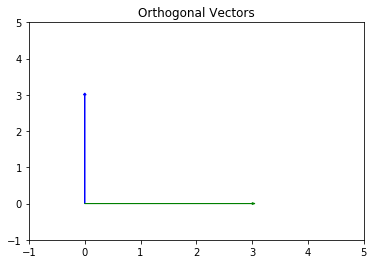

In [84]:
vector_1 = [0, 3]
vector_2 = [3, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title("Orthogonal Vectors")
plt.show()

# a synonym for orthogonal is perpendicular 

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [103]:
vector_3 = [-5, 3, 7]
vector_4 = [6, -8, 2]
np.dot(vector_3, vector_4)
#they are not orthogonal because the product does not equal zero, therefore the vectors are not perpendicular

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = [2, -15, 6, 20]

In [97]:
np.dot(c,c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [105]:
f = [4, 12, 11, 9, 2]
f_hat = f/np.linalg.norm(f)
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [115]:
# Linearly dependent vectors
# they are dependent because 6 is on the same line as 5 since it was just multiplied by 2
vector_5 = np.array([1, 2])
vector_6 = np.multiply(vector_5, 2)
print(vector_5, '\n', vector_6)

[1 2] 
 [2 4]


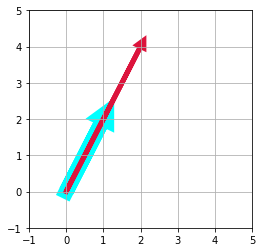

In [117]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,5)          
plt.ylim(-1,5)

#display the vectors

for myvect, mycolor, mywidth in [(vector_5,'cyan', 15),
                                (vector_6, 'crimson', 5)]:
  plt.arrow(0,0, 
            myvect[0],
            myvect[1,],
            head_width=.2,
            head_length=.2, 
            linewidth=mywidth,
            color=mycolor )

In [122]:
vector_7 = np.random.randint(low=-5, high=5, size=2)
vector_8 = np.random.randint(low=-5, high=5, size=2)
print(vector_7, '\n', vector_8)

[-3 -3] 
 [1 3]


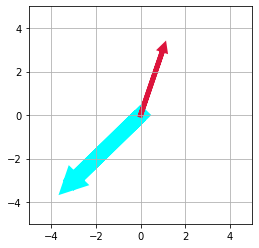

In [123]:
# Set up the grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,5)          
plt.ylim(-5,5)

# Plot the vectors
for myvect, mycolor, mywidth in [(vector_7,'cyan', 15),
                                (vector_8, 'crimson', 5)]:
  plt.arrow(0,0, 
            myvect[0],
            myvect[1,],
            head_width=.2,
            head_length=.2, 
            linewidth=mywidth,
            color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [125]:
# the span is infinite on the plane in which both of these vectors intersect; however, we can find one possibility
g = np.array([1, 2])
h = np.array([4, 8])
a, b = (2, 3)
linear_combo = np.multiply(g, a) + np.multiply(h, b)
linear_combo

array([14, 28])

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [128]:
l = np.array([1,2,3])
m = np.array([-1,0,7])
n = np.array([4,8,2])
print(l + m + n)

[ 4 10 12]


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



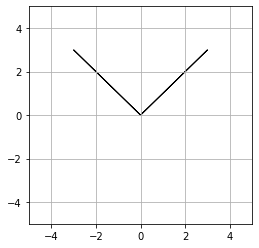

In [131]:
vector_9 = [-3, 3]
vector_10 = [3, 3]

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,5)          
plt.ylim(-5,5)
plt.arrow(0,0, vector_9[0], vector_9[1])
plt.arrow(0,0, vector_10[0], vector_10[1])

## 6.2 What does it mean to form a basis?

The basis is the set of vectors that forms the point of origin and orientation for scalars of vectors. It's essentially the perspective in which all vectors in a constructed coordinate system are transformed.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [132]:
P = P = np.array([[1,2,3], [-1,0,7], [4,8,2]])
pd.DataFrame(P)

,0,1,2
0,1,2,3
1,-1,0,7
2,4,8,2


In [133]:
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

The rank tells us the dimensions of the vector spaced spanned by it's columns. In other words, it tells us how many dimensions are covered in a span from a matrix that are independent. Since a matrix can contain vectors that might be dependent, just because a matrix has 3 columns it may contain vectors that are the same ordinal direction but projected in different scalar magnitudes. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


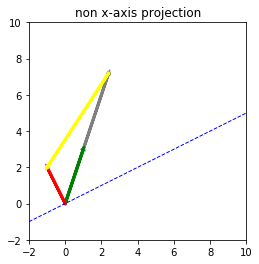

In [136]:
# I dont' relly understand this

# Axis Bounds
plt.xlim(-2,10)          
plt.ylim(-2,10)

# Original Vector
v = [1,3] 
w = [-1,2]
proj = np.multiply(2.4,v)
x_minus_proj = w-proj

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 1/2*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.title("non x-axis projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

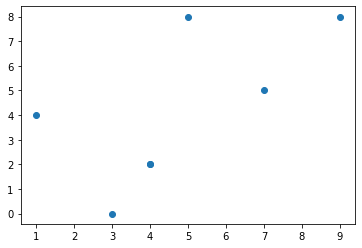

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()